In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

from autoencoder import Autoencoder, Autoencoder_cnn
from stacked_mnist import StackedMNISTData, DataMode
from verification_net import VerificationNet

import warnings
warnings.filterwarnings('ignore', category=Warning)

In [42]:
gen = StackedMNISTData(mode=DataMode.MONO_BINARY_COMPLETE, default_batch_size=10)

In [43]:
model = Autoencoder_cnn(n_channels=1, criterion=nn.BCELoss())

Epoch:1, Loss:0.0668
Epoch:2, Loss:0.0403
Epoch:3, Loss:0.0304
Epoch:4, Loss:0.0257
Epoch:5, Loss:0.0231
Epoch:6, Loss:0.0209
Epoch:7, Loss:0.0194
Epoch:8, Loss:0.0182
Epoch:9, Loss:0.0170
Epoch:10, Loss:0.0158


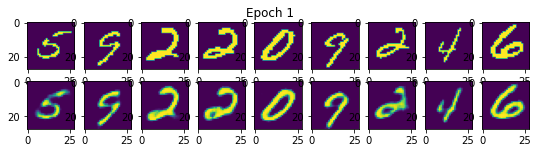

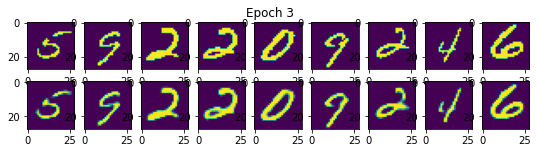

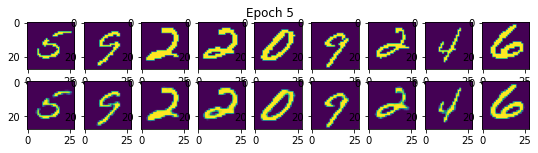

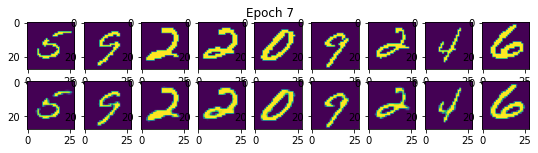

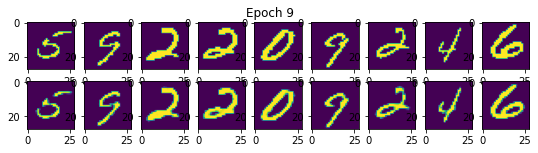

In [44]:
model.fit(gen, epochs=10, visualize=True)

## Test set

In [45]:
test_set = gen.get_full_data_set(training = False)

In [46]:
test_img, test_cls = test_set

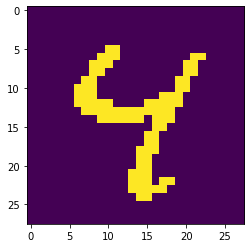

In [48]:
plt.imshow(test_img[6].astype(np.float32))

In [49]:
encoded = model.encode(test_img)

In [9]:
decoded = model.decode(encoded)

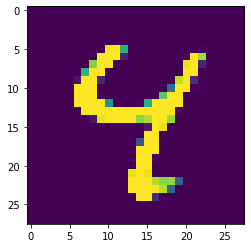

In [10]:
plt.imshow(decoded[6][0])

## Evaluation

In [11]:
net = VerificationNet("./models/verification_model")

In [12]:
decoded = decoded.squeeze(1)
decoded = np.expand_dims(decoded, axis=-1)

In [13]:
decoded.shape

(10000, 28, 28, 1)

In [14]:
net.predict(decoded)

313/313 [==============================] - 6s 19ms/step


(array([7., 2., 1., ..., 4., 5., 6.]),
 array([0.9999814 , 0.99992812, 0.99999344, ..., 0.99999797, 0.99995744,
        0.99999869]))

In [15]:
predictability, accuracy = net.check_predictability(data = decoded, correct_labels = test_cls)

313/313 [==============================] - 6s 19ms/step


In [16]:
print(f"Predictability is {predictability}. Accuracy is {accuracy}")

Predictability is 0.9821. Accuracy is 0.9758


# Autoencoder as generative model

In [50]:
encoded = model.encode(test_img)

In [53]:
generated_imgs = model.generate(10)

In [56]:
generated_imgs.shape

(10, 1, 28, 28)

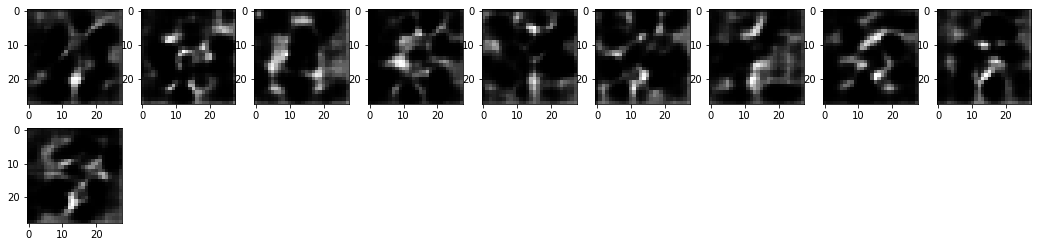

In [61]:
plt.figure(figsize=(18,4))
for i, item in enumerate(generated_imgs):
    plt.subplot(2,9,i+1)
    plt.imshow(np.transpose(item, (1, 2, 0)).astype(np.float), cmap="gray") 

## Stacked 

In [17]:
gen = StackedMNISTData(mode=DataMode.COLOR_BINARY_COMPLETE)

In [18]:
train_img, train_cls = gen.get_full_data_set(training = True)

In [19]:
train_img[0].shape

(28, 28, 3)

In [20]:
train_cls[2]

114

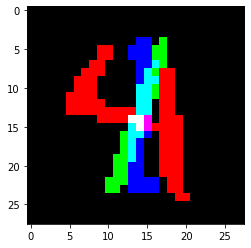

In [21]:
plt.imshow(train_img[2].astype(np.float))

Epoch:1, Loss:0.2075
Epoch:2, Loss:0.1590
Epoch:3, Loss:0.1255
Epoch:4, Loss:0.1060
Epoch:5, Loss:0.1001
Epoch:6, Loss:0.0970
Epoch:7, Loss:0.0950
Epoch:8, Loss:0.0933
Epoch:9, Loss:0.0919
Epoch:10, Loss:0.0906
Epoch:11, Loss:0.0895
Epoch:12, Loss:0.0888
Epoch:13, Loss:0.0880
Epoch:14, Loss:0.0874


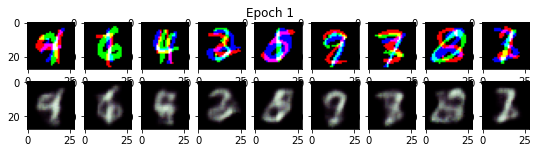

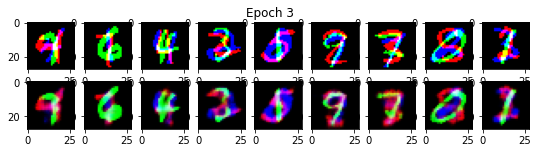

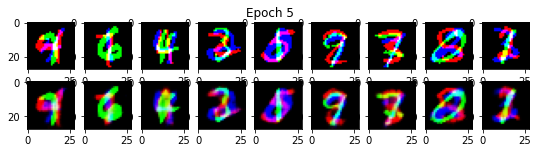

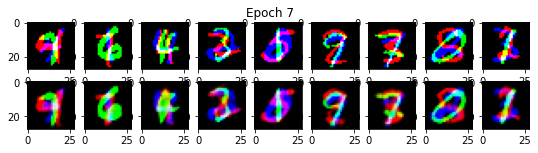

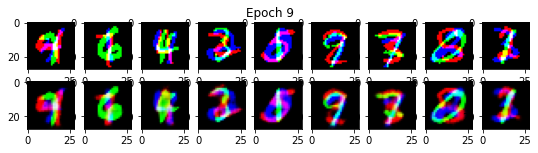

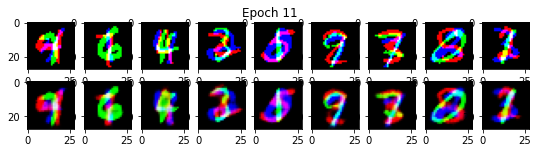

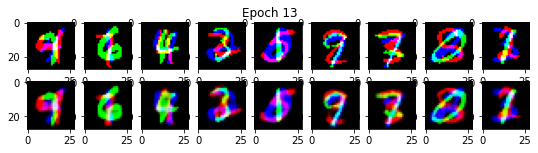

In [22]:
model_rgb = Autoencoder_cnn(n_channels=3,criterion=nn.BCELoss())
gen = StackedMNISTData(mode=DataMode.COLOR_BINARY_COMPLETE, default_batch_size=64)
model_rgb.fit(gen, epochs=14, visualize=True)

## Test set

In [23]:
test_set = gen.get_full_data_set(training = False)

In [24]:
test_img, test_cls = test_set

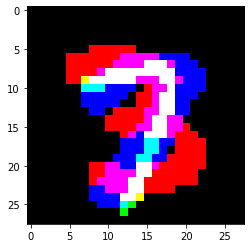

In [25]:
plt.imshow(test_img[4].astype(np.float))

In [26]:
test_cls[5]

718

In [27]:
encoded = model_rgb.encode(test_img)

In [28]:
encoded.shape

torch.Size([10000, 64, 1, 1])

In [29]:
decoded = model_rgb.decode(encoded)

In [30]:
decoded.shape

(10000, 3, 28, 28)

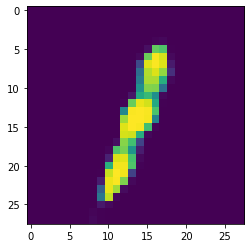

In [31]:
plt.imshow(decoded[5][1])

In [32]:
decoded[5].shape

(3, 28, 28)

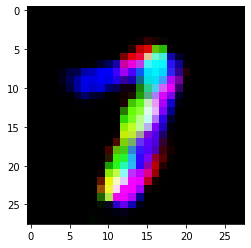

In [33]:
plt.imshow(decoded[5].transpose((1,2,0)))
plt.show()

In [34]:
decoded.transpose((0,2,3,1)).shape

(10000, 28, 28, 3)

In [35]:
predictability, accuracy = net.check_predictability(data = decoded.transpose((0,2,3,1)), correct_labels = test_cls)

313/313 [==============================] - 6s 18ms/step


In [36]:
print(f"Predictability is {predictability}. Accuracy is {accuracy}")

Predictability is 0.6709. Accuracy is 0.5964


# AE as generative model

In [38]:
encoded.shape

torch.Size([10000, 64, 1, 1])